In [1]:
# 하이퍼 파라미터 튜닝 실습

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=66)

In [9]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [10]:
X_train[0]

array([1.387e+01, 2.070e+01, 8.977e+01, 5.848e+02, 9.578e-02, 1.018e-01,
       3.688e-02, 2.369e-02, 1.620e-01, 6.688e-02, 2.720e-01, 1.047e+00,
       2.076e+00, 2.312e+01, 6.298e-03, 2.172e-02, 2.615e-02, 9.061e-03,
       1.490e-02, 3.599e-03, 1.505e+01, 2.475e+01, 9.917e+01, 6.886e+02,
       1.264e-01, 2.037e-01, 1.377e-01, 6.845e-02, 2.249e-01, 8.492e-02])

In [11]:
np.set_printoptions(precision=3, suppress=True)

In [13]:
X_train[0]

array([ 13.87 ,  20.7  ,  89.77 , 584.8  ,   0.096,   0.102,   0.037,
         0.024,   0.162,   0.067,   0.272,   1.047,   2.076,  23.12 ,
         0.006,   0.022,   0.026,   0.009,   0.015,   0.004,  15.05 ,
        24.75 ,  99.17 , 688.6  ,   0.126,   0.204,   0.138,   0.068,
         0.225,   0.085])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
train_acc = []
test_acc = []
n = range(1, 11)
for i in n:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

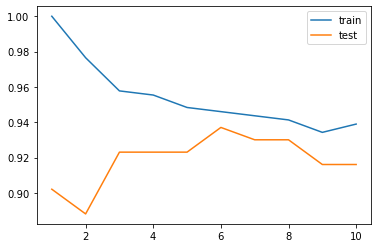

In [17]:
plt.plot(n, train_acc, label='train')
plt.plot(n, test_acc, label='test')
plt.legend()
plt.show()

- test 점수가 가장 높은 6이 적합

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("훈련 점수 : ", knn.score(X_train, y_train))
print("테스트 점수 : ", knn.score(X_test, y_test))

훈련 점수 :  0.9460093896713615
테스트 점수 :  0.9370629370629371


In [ ]:
# SVM(Support Vector Machine)

In [19]:
import mglearn

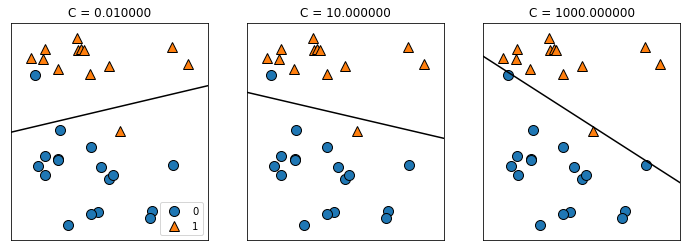

In [20]:
mglearn.plots.plot_linear_svc_regularization()

In [21]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
print("훈련 점수 : ", svc.score(X_train, y_train))
print("테스트 점수 : ", svc.score(X_test, y_test))

In [22]:
# 정규화

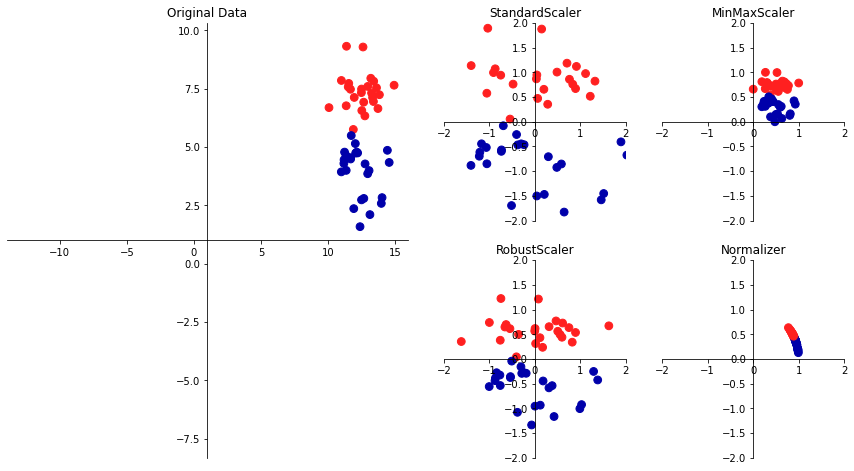

In [23]:
mglearn.plots.plot_scaling()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("훈련 점수 : ", svc.score(X_train_scaled, y_train))
print("테스트 점수 : ", svc.score(X_test_scaled, y_test))

훈련 점수 :  0.9859154929577465
테스트 점수 :  0.972027972027972
